In [1]:
import ROOT
%matplotlib inline
from ROOT import gROOT, TCanvas

Welcome to JupyROOT 6.30/04


## Open the file

In [2]:
# Specify the filename
filename = "run13688_crtana.root"

# Open the ROOT file
file = ROOT.TFile(filename)

# Check if the file is successfully opened
if file.IsOpen():
    print(f"File '{filename}' opened successfully.")
else:
    print(f"Failed to open file '{filename}'.")
    exit()

File 'run13688_crtana.root' opened successfully.


## Open the tree and check contents

In [3]:
# Navigate to the TDirectory "crtana"
crtana_dir = file.Get("crtana")

# Check if the directory is found
if not crtana_dir:
    print("Directory 'crtana' not found.")
    file.Close()
    exit()

# Navigate to the TTree "tree" within "crtana"
tree = crtana_dir.Get("tree")

# Check if the tree is found
if not tree:
    print("Tree 'tree' not found within 'crtana'.")
    file.Close()
    exit()

## Print out the names of branches in the tree
#print("Branches in the 'tree' TTree:")
#for branch in tree.GetListOfBranches():
#    print(branch.GetName())

## Plot cl_sp_ts1 and cl_sp_ts0 for full range

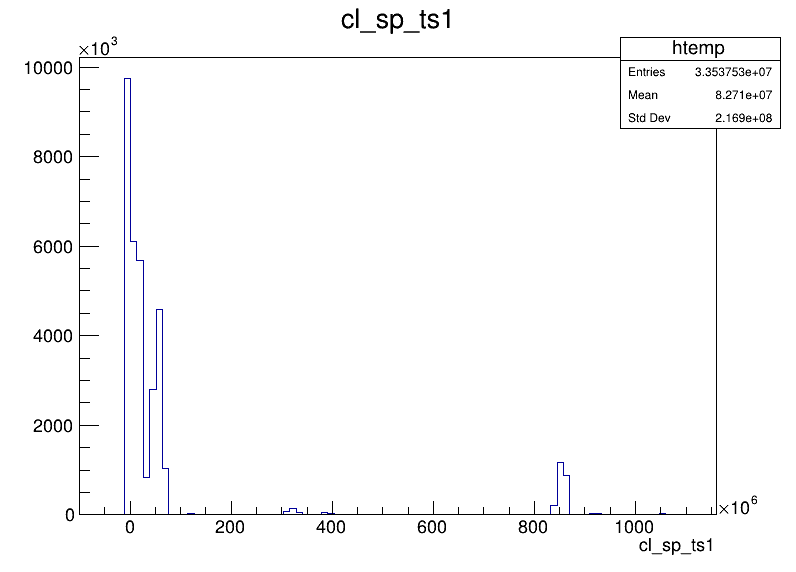

In [4]:
canvas1 = ROOT.TCanvas("canvas", "Interactive Cut", 800, 600)
tree.Draw("cl_sp_ts1")
canvas1.Draw()

In [21]:
canvas1 = ROOT.TCanvas("canvas", "Interactive Cut", 800, 600)
tree.Draw("cl_sp_ts0")
canvas1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


# Plotting an saving the data with the difference

In [8]:
%jsroot on

min_time = -5e9
max_time = 5e9
nbins = 100
t0_hist = ROOT.TH1D("t0_hist", "1D Histogram", 300, 0, 1.5e9)
t1_hist = ROOT.TH1D("t1_hist", "1D Histogram", 300, 1520e3, 1540e3)
t_diff = ROOT.TH1D("time_diff", "1D Histogram", 300, 0, 1.5e9)
first_entry_times = ROOT.TH1D("first_times", "1D Histogram", 300, 0, 1.5e9)
n_entries = tree.GetEntries()
#n_entries = 1000
for i in range(n_entries):
    tree.GetEntry(i)
    plotted_first = False
    if tree.cl_has_sp:
        for j in range(len(tree.cl_sp_ts0)):
            t0 = tree.cl_sp_ts0[j]
            t1 = tree.cl_sp_ts1[j]
            if(t0>0 and not plotted_first):
                first_entry_times.Fill(t0)
            if (t0>0):    
                t0_hist.Fill(t0)
            if (t1>0):    
                t1_hist.Fill(t1)
            if(t0> 0 and t1>0): 
                t_diff.Fill(t0 - t1)
        plotted_first = True

# Set axis labels
t0_hist.GetXaxis().SetTitle("t (ns?)")
t1_hist.GetXaxis().SetTitle("t (ns?)")
t_diff.GetXaxis().SetTitle("t (ns?)")
first_entry_times.GetXaxis().SetTitle("t (ns?)")

t0_hist.SetTitle("t0")
t1_hist.SetTitle("t1")
t_diff.SetTitle("t0 - t1")
first_entry_times.SetTitle("t0 distribution for single event")


# Draw the histogram
c1 = ROOT.TCanvas("c1", "1D Histogram", 800, 600)
t0_hist.Draw()
c1.Draw()
c1.SaveAs("t0.png")

c2 = ROOT.TCanvas("c2", "1D Histogram", 800, 600)
t1_hist.Draw()
c2.Draw()
c2.SaveAs("t1.png")

c3 = ROOT.TCanvas("c3", "1D Histogram", 800, 600)
t_diff.Draw()
c3.Draw()
c3.SaveAs("t_diff.png")

c4 = ROOT.TCanvas("c4", "1D Histogram", 800, 600)
first_entry_times.Draw()
c4.Draw()
c4.SaveAs("first.png")

Warning in <TFile::Append>: Replacing existing TH1: t0_hist (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: t1_hist (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: time_diff (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: first_times (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file t0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file t1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file t_diff.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file first.png has been created
